In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('Morlet_Facies.csv')

In [ ]:
train.shape

(4149, 36)

In [ ]:
train.head(10)

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,F,GRcoef_morl,ILD_log10coef_morl,DeltaPHIcoef_morl,PHINDcoef_morl,PEcoef_morl,F_morl,dist_M_up,dist_M_down,dist_NM_up,dist_NM_down,C LM,A1 LM,A1 SH,C SH,B5 LM,B1 SH,B3 SH,B4 SH,B2 SH,B1 LM,B2 LM,B5 SH,B4 LM,B3 LM,Facies
0,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,0.62,0.090417,-0.000380,0.533730,0.082033,-0.063654,-2.509827e-03,-1.0,21.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
1,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,0.60,-9.386494,-0.082128,-1.148538,-1.407475,-0.628246,-7.755448e-02,-1.0,21.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
2,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,0.59,0.366978,-0.003020,-0.687842,-0.125274,0.027625,-3.502950e-04,-1.0,20.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,0.59,-1.380684,0.000569,-0.125223,-0.018789,0.060617,1.147724e-03,-1.0,20.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
4,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,0.58,-0.948002,-0.000979,0.183364,0.004221,0.039218,-2.483589e-03,-1.0,19.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
5,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894,0.56,1.369202,0.000234,0.256133,0.044752,0.023431,5.410000e-07,-1.0,19.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
6,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872,0.55,0.363538,0.000783,0.046858,-0.012578,-0.049627,2.481813e-03,-1.0,18.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
7,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830,0.55,-0.200857,0.000639,-0.229900,-0.057144,-0.025443,2.850000e-05,-1.0,18.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
8,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809,0.54,0.142524,-0.000520,-0.037621,0.025896,0.037128,-1.220659e-03,-1.0,17.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
9,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787,0.53,0.123989,-0.001747,-0.225905,-0.113171,0.026541,1.251965e-03,-1.0,17.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
y=train.pop('Facies')

In [ ]:
y.head(10)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: Facies, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train=train.drop(['Well Name', 'Formation', 'Depth'], axis=1)
X=train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(3319, 32)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [ ]:
import xgboost as xgb
from xgboost.sklearn import  XGBClassifier

In [ ]:
model2= XGBClassifier(reg_alpha=2, colsample_bytree=0.5, learning_rate= 0.1, gamma= 0.55, reg_lambda= 1.5, max_depth= 8, min_child_weight= 6, n_estimators= 335, subsample= 0.8 )
model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.55,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=6, missing=None, n_estimators=335, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=2, reg_lambda=1.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
model2_predict=model2.predict(X_test)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model2_predict)

In [ ]:
from classification_utilities import display_cm
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
display_cm(cm, facies_labels, display_metrics=True)

     Pred
            SS
          CSiS
          FSiS
          SiSh
            MS
            WS
             D
            PS
            BS
         Total
     True
            SS
            46
            12
             7
              
              
              
              
              
              
            65
          CSiS
             6
           146
            20
              
              
              
              
              
              
           172
          FSiS
              
            28
           113
              
             1
              
              
             2
              
           144
          SiSh
              
              
             3
            39
             5
            12
             1
             1
              
            61
            MS
             1
              
             1
             2
            23
            15
             1
             5
              
            48
     

In [ ]:
import numpy as np

In [ ]:
def accuracy(cm):
    total_correct = 0.
    nb_classes = cm.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += cm[i][i]
    acc = total_correct/sum(sum(cm))
    return acc

In [ ]:
print ('Facies classification accuracy = %f' % accuracy(cm))

Facies classification accuracy = 0.756627


Text(0.5, 1.0, 'Confusion Matrix')

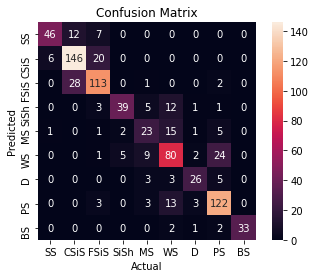

In [ ]:
import seaborn as sns
axes = sns.heatmap(cm,annot=True, fmt="d",square=True, cbar=True, xticklabels= facies_labels, yticklabels= facies_labels)
axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.set_title('Confusion Matrix')

In [ ]:
validation = pd.read_csv('Morlet_nofacies_dum.csv')

In [ ]:
validation.head()

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,F,GRcoef_morl,ILD_log10coef_morl,DeltaPHIcoef_morl,PHINDcoef_morl,PEcoef_morl,F_morl,dist_M_up,dist_M_down,dist_NM_up,dist_NM_down,C LM,A1 LM,A1 SH,C SH,B5 LM,B1 SH,B3 SH,B4 SH,B2 SH,B1 LM,B2 LM,B5 SH,B4 LM,B3 LM,LithCode
0,A1 SH,STUART,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000,0.614,1.380745,-0.005680,0.406935,0.168124,-0.031891,-0.008994,-1.0,20.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
1,A1 SH,STUART,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978,0.543,-7.467020,-0.079874,-0.047324,-1.108156,-0.476749,-0.080870,-1.0,20.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
2,A1 SH,STUART,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956,0.500,-1.943368,0.006165,-0.396969,-0.255239,0.003899,0.009737,-1.0,19.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
3,A1 SH,STUART,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933,0.529,-1.219471,0.009349,-0.471441,-0.301275,0.047359,0.013750,-1.0,19.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
4,A1 SH,STUART,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911,0.585,0.029547,0.000309,-0.242579,0.026496,0.019691,-0.000013,-1.0,18.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
y=validation.pop('LithCode')

In [ ]:
y.head(10)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    2
9    2
Name: LithCode, dtype: int64

In [ ]:
validation=validation.drop(['Well Name', 'Formation', 'Depth'], axis=1)

In [ ]:
validation.head(5)

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,F,GRcoef_morl,ILD_log10coef_morl,DeltaPHIcoef_morl,PHINDcoef_morl,PEcoef_morl,F_morl,dist_M_up,dist_M_down,dist_NM_up,dist_NM_down,C LM,A1 LM,A1 SH,C SH,B5 LM,B1 SH,B3 SH,B4 SH,B2 SH,B1 LM,B2 LM,B5 SH,B4 LM,B3 LM
0,66.276,0.630,3.3,10.65,3.591,1,1.000,0.614,1.380745,-0.005680,0.406935,0.168124,-0.031891,-0.008994,-1.0,20.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,77.252,0.585,6.5,11.95,3.341,1,0.978,0.543,-7.467020,-0.079874,-0.047324,-1.108156,-0.476749,-0.080870,-1.0,20.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,82.899,0.566,9.4,13.60,3.064,1,0.956,0.500,-1.943368,0.006165,-0.396969,-0.255239,0.003899,0.009737,-1.0,19.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,80.671,0.593,9.5,13.25,2.977,1,0.933,0.529,-1.219471,0.009349,-0.471441,-0.301275,0.047359,0.013750,-1.0,19.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,75.971,0.638,8.7,12.35,3.020,1,0.911,0.585,0.029547,0.000309,-0.242579,0.026496,0.019691,-0.000013,-1.0,18.5,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_predict=model2.predict(validation)

In [ ]:
cm = metrics.confusion_matrix(y, y_predict)

In [ ]:
from classification_utilities import display_cm
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
display_cm(cm, facies_labels, display_metrics=True)

     Pred
            SS
          CSiS
          FSiS
          SiSh
            MS
            WS
             D
            PS
            BS
         Total
     True
            SS
              
            14
              
              
              
              
              
              
              
            14
          CSiS
              
            84
            22
              
              
              
              
             5
              
           111
          FSiS
              
            56
            61
              
             1
              
              
            11
              
           129
          SiSh
              
              
             1
            60
             1
             6
             1
              
            18
            87
            MS
              
              
             1
             9
             7
            18
              
            10
            10
            55
     

/content/classification_utilities.py:7: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diagonal(cm)/np.sum(cm, axis=0).astype('float')
/content/classification_utilities.py:9: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * (precision * recall) / (precision + recall)


Text(0.5, 1.0, 'Confusion Matrix')

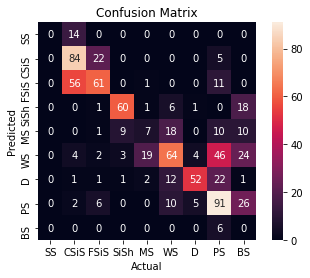

In [ ]:
import seaborn as sns
axes = sns.heatmap(cm,annot=True, fmt="d",square=True, cbar=True, xticklabels= facies_labels, yticklabels= facies_labels)
axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.set_title('Confusion Matrix')